In [1]:
# the ideal Target sementation is 
# the target segment must be  homogeneous 
# Distinct and large enough to justify 

## strengths of McDonald’s
# it is to be identifiable and reachable

###    A.1 Step 1: Deciding (not) to Segment
* McDonald’s can take the position that it caters to the entire market and that there is no need to understand systematic differences across market segments.Alternatively, McDonald’s can take the position that, despite their market power, there is value in investigating systematic heterogeneity among consumers and harvest these differences using a differentiated marketing strategy.

###  A.2 Step 2: Specifying the Ideal Target Segment
In terms of knock-out criteria,
* the target segment must be homogeneous 
* distinct 
* large enough to justify the development and implementation of a customised marketing mix.
* matching the strengths of McDonald’s
* reachable

In terms of segment attractiveness criteria,
* segment that has a positive perception of McDonald’s
* frequently eats out and likes fast food. But McDonald’s management could also decide that they not only wish to solidify their position in market segments in which they already hold high market shares, but rather wish to learn more about market segments which are currently not fond of McDonald’s

### A.3 Step 3: Collecting Data
The data set contains responses from 1453 adult Australian consumers relating to
their perceptions of McDonald’s with respect to the following attributes: 
* YUMMY,
* CONVENIENT, 
* SPICY,
* FATTENING, 
* GREASY,
* FAST, 
* CHEAP, 
* TASTY,
* EXPENSIVE,
* HEALTHY
* DISGUSTING.

These attributes emerged from a qualitative study conducted in preparation of the survey study. For each of those attributes, respondents provided either a YES response,or a NO response 

In [2]:
#importing neccessary libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline 

### A.4 Step 4: Exploring Data

In [3]:
# loading the data using pandas 
data = pd.read_csv('mcdonalds.csv')
data.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [5]:
data.shape

(1453, 15)

In [6]:
#columns 
data.columns.values.tolist()

['yummy',
 'convenient',
 'spicy',
 'fattening',
 'greasy',
 'fast',
 'cheap',
 'tasty',
 'expensive',
 'healthy',
 'disgusting',
 'Like',
 'Age',
 'VisitFrequency',
 'Gender']

In [7]:
# Selecting the columns 1 to 11
MD_x = data.iloc[:, 0:11]
# Convert to a binary matrix (0 or 1)
MD_x = (MD_x == "Yes").astype(int)
# Calculate column means
means = np.round(MD_x.mean(), 2)
print(means)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


#### The average values of the transformed binary numeric segmentation variables indicate that
(55%) perceive McDonald’s as YUMMY,
91% believe that eating at McDonald’s is CONVENIENT, 
but only 9% think that
McDonald’s food is SPICY.

In [8]:
from sklearn.decomposition import PCA

In [9]:
# PCA
MD_pca = PCA()
MD_pca.fit(MD_x)

# the summary
summary = pd.DataFrame({
    "Standard deviation": np.round(MD_pca.explained_variance_**0.5, 4),
    "Proportion of Variance": np.round(MD_pca.explained_variance_ratio_, 4),
    "Cumulative Proportion": np.round(np.cumsum(MD_pca.explained_variance_ratio_), 4)
}, index=[f"PC{i+1}" for i in range(MD_x.shape[1])])

print(summary)


      Standard deviation  Proportion of Variance  Cumulative Proportion
PC1               0.7570                  0.2994                 0.2994
PC2               0.6075                  0.1928                 0.4922
PC3               0.5046                  0.1330                 0.6253
PC4               0.3988                  0.0831                 0.7084
PC5               0.3374                  0.0595                 0.7679
PC6               0.3103                  0.0503                 0.8182
PC7               0.2897                  0.0438                 0.8620
PC8               0.2751                  0.0395                 0.9016
PC9               0.2653                  0.0368                 0.9383
PC10              0.2488                  0.0324                 0.9707
PC11              0.2369                  0.0293                 1.0000


In [10]:
#  PCA
pca = PCA()
pca_result = pca.fit_transform(MD_x)

#explained variance ratio and cumulative explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

print("Explained Variance Ratio:")
print(explained_variance_ratio)

print("\nCumulative Explained Variance:")
print(cumulative_variance)

# rotation matrix
rotation_matrix = pca.components_
rotation_df = pd.DataFrame(rotation_matrix, columns=MD_x.columns)

print("\nRotation Matrix:")
print(rotation_df)


Explained Variance Ratio:
[0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]

Cumulative Explained Variance:
[0.29944723 0.49224445 0.6252898  0.70838558 0.7678661  0.81816566
 0.86201476 0.90156255 0.93832345 0.97067674 1.        ]

Rotation Matrix:
       yummy  convenient     spicy  fattening    greasy      fast     cheap  \
0  -0.476933   -0.155332 -0.006356   0.116232  0.304443 -0.108493 -0.337186   
1   0.363790    0.016414  0.018809  -0.034094 -0.063839 -0.086972 -0.610633   
2  -0.304444   -0.062515 -0.037019  -0.322359 -0.802373 -0.064642 -0.149310   
3   0.055162   -0.142425  0.197619  -0.354139  0.253960 -0.097363  0.118958   
4  -0.307535    0.277608  0.070620  -0.073405  0.361399  0.107930 -0.128973   
5   0.170738   -0.347830 -0.355087  -0.406515  0.209347 -0.594632 -0.103241   
6  -0.280519   -0.059738  0.707637  -0.385943  0.036170 -0.086846 -0.040449   
7   0.013041   -0.113079  0.375934   0.58962

<Figure size 900x600 with 0 Axes>

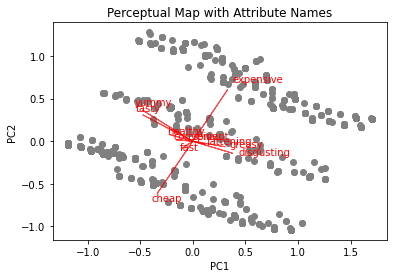

In [11]:
plt.figure(dpi=150)

# Create a figure and axis object
fig, ax = plt.subplots()

# Scatter plot of the first two principal components
ax.scatter(pca_result[:, 0], pca_result[:, 1], color="grey")
ax.set_title("PCA Scatter Plot")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")

# Plotting the principal component axes
for i in range(rotation_matrix.shape[1]):
    ax.arrow(0, 0, rotation_matrix[0, i], rotation_matrix[1, i], color='red', alpha=0.7)
    ax.text(rotation_matrix[0, i]*1.15, rotation_matrix[1, i]*1.15, MD_x.columns[i], color='red')

ax.set_title("Perceptual Map with Attribute Names")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
plt.show();

from the above perceptual map consumer perceptions of McDonald's, it indicates the importance of price-related attributes (CHEAP and EXPENSIVE). 

### Step 5: Extracting Segments
A.5.1 Using k-Means

calculating the solutions for two to eight market segments using standard k-means
analysis with ten random restarts

In [12]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

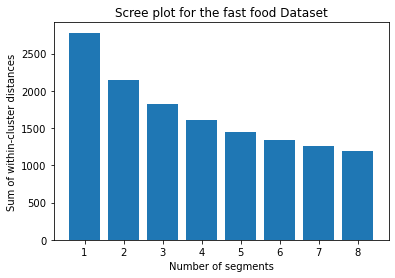

In [13]:
# k-Means Clustering
# Set seed for reproducibility
np.random.seed(1234)

nrep = 10
#  k-means clustering for k = 2 to 8 with 10 random restarts
num_segments = range(1, 9)
within_cluster_distances = []
MD_km28 = {}

for k in num_segments:
    kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)
    kmeans.fit(MD_x)
    within_cluster_distances.append((kmeans.inertia_))
    MD_km28[str(k)] = kmeans

# Plotting the results
plt.bar(num_segments, within_cluster_distances)
plt.xlabel("Number of segments")
plt.ylabel("Sum of within-cluster distances")
plt.title("Scree plot for the fast food Dataset")
plt.show()


* The scree plot indicates that as the number of market segments increases, the sum of distances within segments decreases slowly. we  expect the values to  decrease in distance, this indicates that for determining the optimal number of segments, This scree plot does not provide useful guidance on the number of market segments to extract

* A second approach to determining a good number of segments is to use stability-based data structure analysis. it involves analyzing the data structure to assess whether market segments naturally emerge or require artificial construction. This method evaluates the stability across replications, ensuring that the segmentation solution is not randomly unstable. Global stability measures the consistency of the segmentation solution across multiple analyses using bootstrap samples.

In [14]:
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score

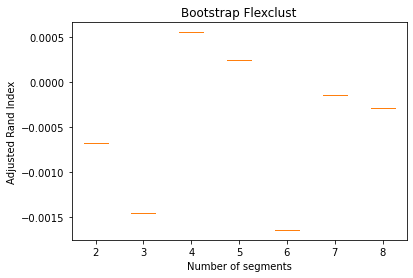

In [15]:
np.random.seed(1234)
nrep = 10
nboot = 100
bootstrap_samples = []
for _ in range(nboot):
    bootstrap_sample = resample(MD_x.values, random_state=1234) 
    bootstrap_samples.append(bootstrap_sample)

adjusted_rand_index = []
num_segments = range(2, 9)
for k in num_segments:
    stability_scores = []
    for bootstrap_sample in bootstrap_samples:
        kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)  
        kmeans.fit(bootstrap_sample)
        cluster_labels = kmeans.predict(bootstrap_sample)
        true_labels = kmeans.predict(MD_x.values)
        stability_score = adjusted_rand_score(true_labels, cluster_labels)
        stability_scores.append(stability_score)
    adjusted_rand_index.append(stability_scores)

# Transpose the adjusted_rand_index list
adjusted_rand_index = np.array(adjusted_rand_index).T

#  boxplot of adjusted Rand index
plt.boxplot(adjusted_rand_index, labels=num_segments, whis=10)
plt.xlabel("Number of segments")
plt.ylabel("Adjusted Rand Index")
plt.title("Bootstrap Flexclust")
plt.show()

In [16]:
MD_x.columns 

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting'],
      dtype='object')

* Another way of exploring the data before committing to the final market segmentation solution is to inspect how segment memberships change each time an additional market segment is added, and to assess segment level stability across solutions.This information is contained in the segment level stability across solutions (SLSA) plot.

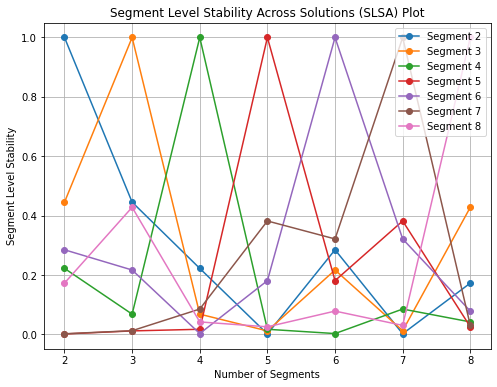

In [17]:
num_segments = range(2, 9)

segment_stability = []
for segment in range(2, 9):
    labels_segment = MD_km28[str(segment)].predict(MD_x)  
    segment_stability.append(labels_segment)

plt.figure(figsize=(8, 6))
for i, segment in enumerate(range(2, 9)):
    plt.plot(num_segments, [np.mean(segment_stability[i] == labels) for labels in segment_stability], marker='o', label=f'Segment {segment}')

plt.xlabel('Number of Segments')
plt.ylabel('Segment Level Stability')
plt.title('Segment Level Stability Across Solutions (SLSA) Plot')
plt.xticks(num_segments)
plt.legend()
plt.grid(True)

plt.show()

* global stability assesses the stability of a segmentation solution in its entirety. It does not investigate the stability of each market segment. We obtain the stability of each segment by calculating segment level stability within solutions (SLSW)

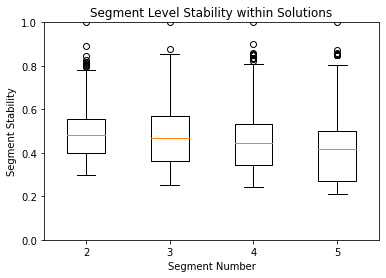

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Define segment solutions
segment_solutions = ["2", "3", "4", "5"]

# Calculating segment labels and similarities
segment_labels = {segment: MD_km28[segment].predict(MD_x) for segment in segment_solutions}
segment_similarities = {segment: MD_km28[segment].transform(MD_x).min(axis=1) for segment in segment_solutions}

# Calculating normalized similarities for stability
segment_stability_values = [similarities / np.max(similarities) for similarities in segment_similarities.values()]

# Plotting boxplot for segment stability
plt.boxplot(segment_stability_values, whis=1.5)
plt.xlabel("Segment Number")
plt.ylabel("Segment Stability")
plt.xticks(range(1, len(segment_solutions) + 1), segment_solutions)
plt.ylim(0, 1)
plt.title("Segment Level Stability within Solutions")
plt.show()


### Using Mixtures of Distributions
* We calculate latent class analysis using a finite mixture of binary distributions. The mixture model maximises the likelihood to extract segments

In [19]:
from scipy.stats import entropy

np.random.seed(1234)
k_values = range(2, 9)
MD_m28 = []

for k in k_values:
    model = KMeans(n_clusters=k, random_state=1234)
    model.fit(MD_x.values)  
    iter_val = model.n_iter_
    converged = True
    k_val = k
    k0_val = k
    log_likelihood = -model.inertia_
    n_samples, _ = MD_x.shape
    aic = -2 * log_likelihood + 2 * k
    bic = -2 * log_likelihood + np.log(n_samples) * k
    labels = model.labels_
    counts = np.bincount(labels)
    probs = counts / float(counts.sum())
    class_entropy = entropy(probs)
    icl = bic - class_entropy
    
    MD_m28.append((iter_val, converged, k_val, k0_val, log_likelihood, aic, bic, icl))
MD_m28 = pd.DataFrame(MD_m28, columns=['iter', 'converged', 'k', 'k0', 'logLik', 'AIC', 'BIC', 'ICL'])

print(MD_m28)


   iter  converged  k  k0       logLik          AIC          BIC          ICL
0     8       True  2   2 -2145.503727  4295.007454  4305.570225  4304.904547
1    11       True  3   3 -1819.748502  3645.497005  3661.341162  3660.260456
2     7       True  4   4 -1602.986015  3213.972030  3235.097572  3233.753684
3    10       True  5   5 -1452.957358  2915.914716  2942.321644  2940.741819
4    11       True  6   6 -1342.432498  2696.864997  2728.553310  2726.790129
5     8       True  7   7 -1253.204246  2520.408493  2557.378192  2555.459383
6     6       True  8   8 -1187.122050  2390.244101  2432.495186  2430.451180


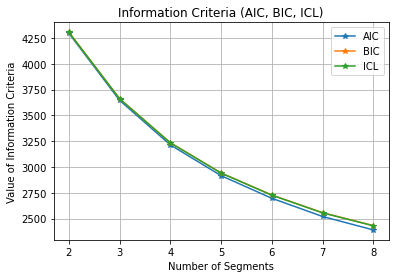

In [20]:
num_segments = MD_m28["k"]
AIC_values = MD_m28["AIC"]
BIC_values = MD_m28["BIC"]
ICL_values = MD_m28["ICL"]

plt.plot(num_segments, AIC_values, marker='*', label='AIC')
plt.plot(num_segments, BIC_values, marker='*', label='BIC')
plt.plot(num_segments, ICL_values, marker='*', label='ICL')

plt.xlabel('Number of Segments')
plt.ylabel('Value of Information Criteria')
plt.title('Information Criteria (AIC, BIC, ICL)')
plt.legend()
plt.grid(True)

plt.show()


* Figure plots the information criteria values AIC, BIC and ICL on the y-axis for the different number of components (segments) on the x-axis. As can be seen, the values of all information criteria decrease quite dramatically until four components (market segments) are reached.

In [21]:
from sklearn.mixture import GaussianMixture
import pandas as pd

# Set the number of clusters
k = 4

# K-means clustering
kmeans = KMeans(n_clusters=k, random_state=1234)
kmeans_clusters = kmeans.fit_predict(MD_x.values)

# Gaussian Mixture Model clustering
gmm = GaussianMixture(n_components=k, random_state=1234)
gmm_clusters = gmm.fit_predict(MD_x.values)

results = pd.DataFrame({'kmeans': kmeans_clusters, 'mixture': gmm_clusters})
MD_m4 = MD_x[results['mixture'] == 3]
k4_m4 = KMeans(n_clusters=k, random_state=1234)
k4_m4_clusters = k4_m4.fit_predict(MD_m4.values)

results_m4 = pd.DataFrame({'kmeans': k4_m4_clusters, 'mixture': 3})
print(pd.crosstab(results['kmeans'], results['mixture']))
print(pd.crosstab(results['kmeans'], results_m4['kmeans']))

mixture    0    1    2    3
kmeans                     
0         99    5  253    7
1          0  211   24    5
2        500    0    0   33
3         22   38    0  256
kmeans   0   1   2   3
kmeans                
0       35  30  11   3
1       16  18   8   7
2       44  39  14  12
3       30  26   5   3


In [22]:
from sklearn.mixture import GaussianMixture

# Create Gaussian Mixture Models with 4 components
gmm_m4a = GaussianMixture(n_components=4)
gmm_m4 = GaussianMixture(n_components=4)

gmm_m4a.fit(MD_x.values)
gmm_m4.fit(MD_x.values)

log_likelihood_m4a = gmm_m4a.score(MD_x.values)
log_likelihood_m4 = gmm_m4.score(MD_x.values)

print(f"Log-likelihood for MD.m4a: {log_likelihood_m4a}")
print(f"Log-likelihood for MD.m4: {log_likelihood_m4}")


Log-likelihood for MD.m4a: 9.456781748071885
Log-likelihood for MD.m4: 7.32977277511693


### Using Mixtures of Regression Models

In [23]:
like_counts = pd.value_counts(data['Like'])
reversed_counts = like_counts.iloc[::-1]
print(reversed_counts)

-1               58
-2               59
-4               71
-3               73
I love it!+5    143
I hate it!-5    152
+1              152
+4              160
0               169
+2              187
+3              229
Name: Like, dtype: int64


In [24]:
like_mapping = {
    'I HATE IT!-5': -5,
    '-4': -4,
    '-3': -3,
    '-2': -2,
    '-1': -1,
    '0': 0,
    '1': 1,
    '2': 2,
    '3': 3,
    '4': 4,
    'I LOVE IT!+5': 5
}

data['Like.n'] = data['Like'].map(like_mapping)

like_n_counts = data['Like.n'].value_counts()

print(like_n_counts)


 0.0    169
-3.0     73
-4.0     71
-2.0     59
-1.0     58
Name: Like.n, dtype: int64


In [25]:
from patsy import dmatrices

In [26]:
independent_vars = data.columns[0:11]
formula_str = ' + '.join(independent_vars)
formula_str = 'Like ~ ' + formula_str
f = dmatrices(formula_str, data=data)[1]
print(f)

[[1. 0. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 1. 0. 0.]
 [1. 0. 1. ... 1. 1. 0.]
 ...
 [1. 1. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 0. 1. 0.]
 [1. 0. 1. ... 1. 0. 1.]]


#### We fit a finite mixture of linear regression models with the EM algorithm using nrep = 10 random starts andk = 2components.We ask for the progress of the EM algorithm not to be visible on screen during estimation

In [27]:
from sklearn.mixture import GaussianMixture
from patsy import dmatrix

In [28]:
np.random.seed(1234)

X = dmatrix(f.design_info, data=data)
y = dmatrix('Like', data=data)

n_components = 2
n_init = 10
verbose = False
n_rep = 10

model = GaussianMixture(n_components=n_components, n_init=n_init, verbose=verbose)
MD_reg2 = model.fit(X, y)

print(MD_reg2)

cluster_sizes = np.bincount(model.predict(X))
print("Cluster sizes:")
for i, size in enumerate(cluster_sizes):
    print(f"{i+1}: {size}")

GaussianMixture(n_components=2, n_init=10, verbose=False)
Cluster sizes:
1: 985
2: 468


### Step 6: Profiling Segments

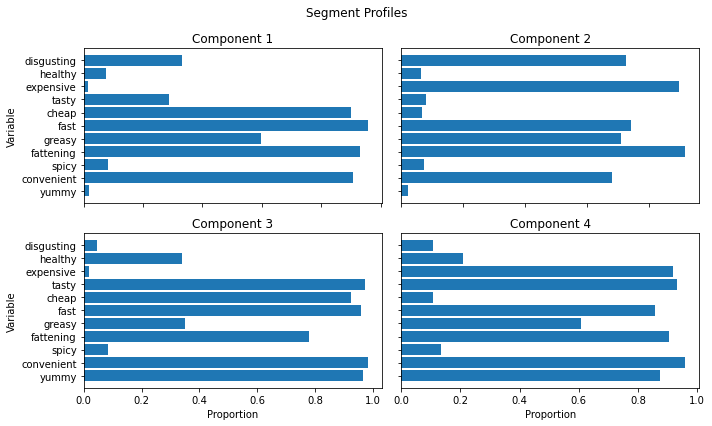

In [29]:
kmeans = MD_km28['4']

labels = kmeans.labels_

MD_mean = MD_x.groupby(labels).mean()

fig, axs = plt.subplots(2, 2, figsize=(10, 6))
axs[0, 0].barh(range(MD_mean.shape[1]), MD_mean.iloc[0])
axs[0, 0].set_title('Component 1')
axs[0, 1].barh(range(MD_mean.shape[1]), MD_mean.iloc[1])
axs[0, 1].set_title('Component 2')
axs[1, 0].barh(range(MD_mean.shape[1]), MD_mean.iloc[2])
axs[1, 0].set_title('Component 3')
axs[1, 1].barh(range(MD_mean.shape[1]), MD_mean.iloc[3])
axs[1, 1].set_title('Component 4')

for ax in axs.flat:
    ax.set(ylabel='Variable', xlabel='Proportion')
    ax.set_yticks(range(MD_mean.shape[1]))
    ax.set_yticklabels(MD_x.columns)

for ax in axs.flat:
    ax.label_outer()

fig.suptitle('Segment Profiles')
fig.tight_layout()
plt.show()


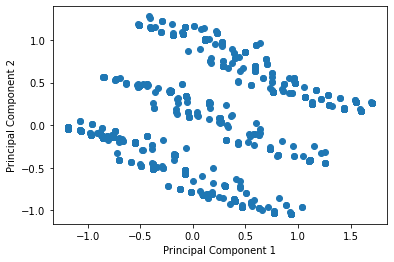

In [30]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(MD_x)

pca = PCA(n_components=2)
MD_pca = pca.fit_transform(MD_x)

fig, ax = plt.subplots()

ax.scatter(MD_pca[:, 0], MD_pca[:, 1])
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
plt.show()


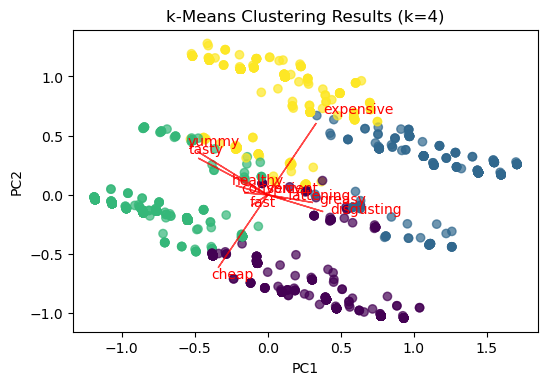

In [31]:
# Visualizing k-Means Results with Projection Lines
best_k = 4
best_kmeans = MD_km28[str(best_k)]

plt.figure(dpi=100)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=best_kmeans.labels_, cmap='viridis', alpha=0.7)
plt.title(f'k-Means Clustering Results (k={best_k})')
plt.xlabel('PC1')
plt.ylabel('PC2')

for i in range(rotation_matrix.shape[1]):
    plt.arrow(0, 0, rotation_matrix[0, i], rotation_matrix[1, i], color='red', alpha=0.7)
    plt.text(rotation_matrix[0, i]*1.15, rotation_matrix[1, i]*1.15, MD_x.columns[i], color='red')

plt.show();


### Step 7: Describing Segments

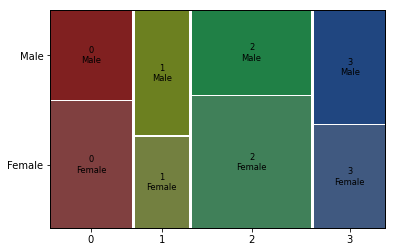

In [32]:
from statsmodels.graphics.mosaicplot import mosaic

MD_k4 = MD_km28['4']
k4 = MD_k4.labels_

ct = pd.crosstab(k4, data['Gender'])

mosaic(ct.stack(), gap=0.01)
plt.show()


In [33]:
MD_x.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting'],
      dtype='object')

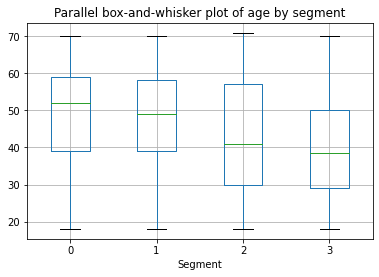

In [34]:
df = pd.DataFrame({'Segment': k4, 'Age': data['Age']})
df.boxplot(by='Segment', column='Age')
plt.title('Parallel box-and-whisker plot of age by segment')
plt.suptitle('')
plt.show()


In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, export_text

In [36]:
best_kmeans = MD_km28['4'].labels_
# Decision Tree
MD_dt = DecisionTreeClassifier(random_state=1234, max_depth=4)
MD_dt.fit(MD_x, best_kmeans)


DecisionTreeClassifier(max_depth=4, random_state=1234)

|--- yummy <= 0.50
|   |--- expensive <= 0.50
|   |   |--- cheap <= 0.50
|   |   |   |--- disgusting <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- disgusting >  0.50
|   |   |   |   |--- class: 1
|   |   |--- cheap >  0.50
|   |   |   |--- fattening <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- fattening >  0.50
|   |   |   |   |--- class: 0
|   |--- expensive >  0.50
|   |   |--- tasty <= 0.50
|   |   |   |--- cheap <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- cheap >  0.50
|   |   |   |   |--- class: 1
|   |   |--- tasty >  0.50
|   |   |   |--- disgusting <= 0.50
|   |   |   |   |--- class: 3
|   |   |   |--- disgusting >  0.50
|   |   |   |   |--- class: 1
|--- yummy >  0.50
|   |--- expensive <= 0.50
|   |   |--- cheap <= 0.50
|   |   |   |--- greasy <= 0.50
|   |   |   |   |--- class: 2
|   |   |   |--- greasy >  0.50
|   |   |   |   |--- class: 3
|   |   |--- cheap >  0.50
|   |   |   |--- tasty <= 0.50
|   |   |   |   |--- class: 2
|   |   |   |--- t

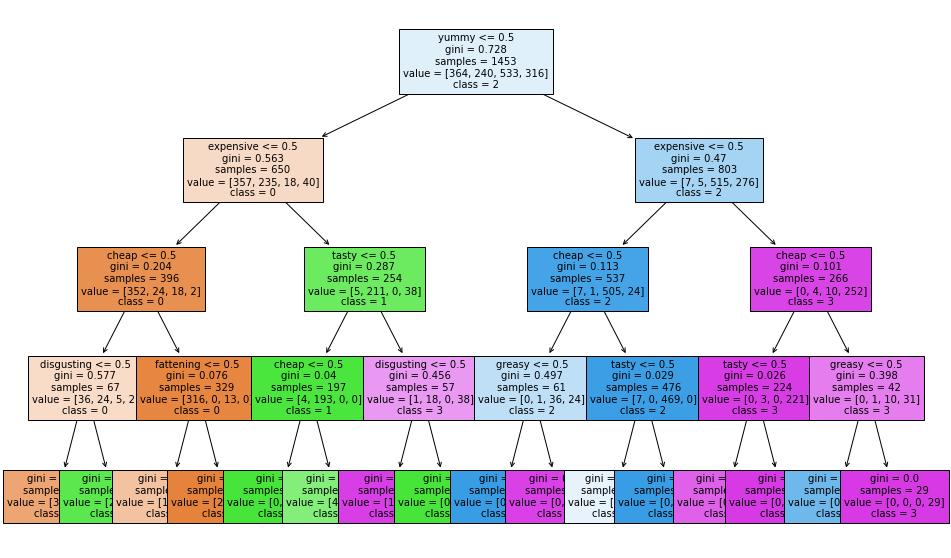

In [37]:
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
best_kmeans = MD_km28['4'].labels_
# Decision Tree
MD_dt = DecisionTreeClassifier(random_state=1234, max_depth=4).fit(MD_x, best_kmeans)
# Decision tree rules
tree_rules = export_text(MD_dt, feature_names=MD_x.columns.tolist())
print(tree_rules)
plt.figure(figsize=(16, 10))
plot_tree(MD_dt, feature_names=MD_x.columns.tolist(), filled=True, class_names=[str(i) for i in range(4)],
          fontsize=10, max_depth=4)
plt.show()

Segment Means:
      yummy  convenient     spicy  fattening    greasy      fast     cheap  \
0  0.019231    0.906593  0.082418   0.931319  0.596154  0.956044  0.901099   
1  0.020833    0.679167  0.075000   0.916667  0.708333  0.741667  0.066667   
2  0.966229    0.981238  0.084428   0.778612  0.348968  0.958724  0.923077   
3  0.873418    0.958861  0.136076   0.905063  0.607595  0.857595  0.107595   

      tasty  expensive   healthy  disgusting  
0  0.285714   0.013736  0.074176    0.329670  
1  0.079167   0.895833  0.062500    0.725000  
2  0.973734   0.018762  0.339587    0.046904  
3  0.930380   0.917722  0.208861    0.107595  


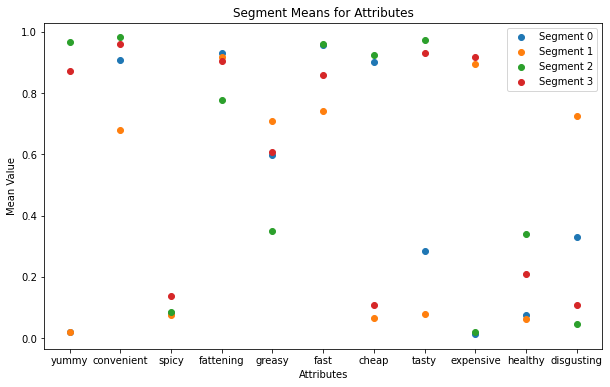

In [38]:
# Market Segmentation Analysis
segment_means = MD_x.groupby(best_kmeans).mean()
print("Segment Means:")
print(segment_means)

plt.figure(figsize=(10, 6))
for segment in segment_means.index:
    plt.scatter(segment_means.columns, segment_means.loc[segment], label=f'Segment {segment}')

plt.xlabel('Attributes')
plt.ylabel('Mean Value')
plt.title('Segment Means for Attributes')
plt.legend()
plt.show()


<Figure size 864x576 with 0 Axes>

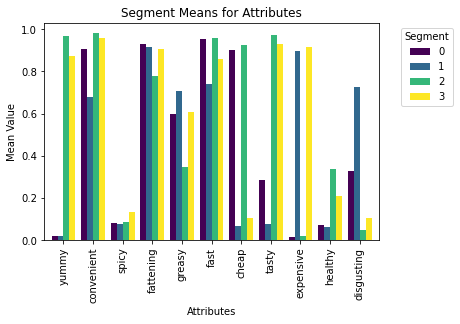

In [39]:
# Market Segmentation Analysis with Bar Plot
segment_means = MD_x.groupby(best_kmeans).mean()

plt.figure(figsize=(12, 8))
segment_means.T.plot(kind='bar', colormap='viridis', width=0.8)

plt.xlabel('Attributes')
plt.ylabel('Mean Value')
plt.title('Segment Means for Attributes')
plt.legend(title='Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show();
